<a href="https://colab.research.google.com/github/donlee4u/ML_Class/blob/main/13%EC%A3%BC%EC%B0%A8_Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<br><br>

# Decision Tree

__Entropy__
<br>

$$\text{Entropy} = -\sum_{i=1}^{C} p_i \log_2 p_i$$
<br>
Where:

- $ C = $  Number of classes  
- $ p_i = $ Proportion of class $ i $ in the node  

- Entropy $ = 0 \rightarrow$ Pure node (homogeneous set)  
- Entropy $=$ High $\rightarrow$ Highly disordered node (mixed classes)

<br>

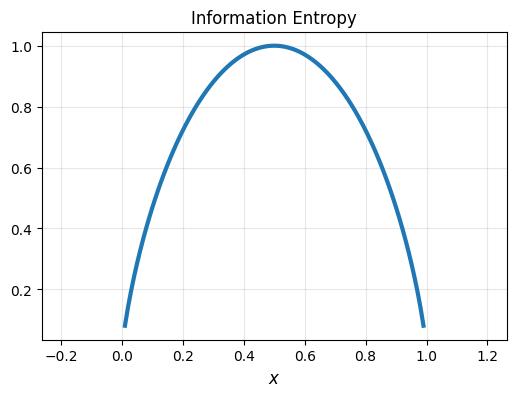

In [ ]:
# Information entropy

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(0.01, 0.99, 100)
y =

plt.figure(figsize = (6, 4))
plt.plot(x, y, linewidth = 3)
plt.xlabel(r'$x$', fontsize = 12)
plt.axis('equal')
plt.grid(alpha = 0.3)
plt.title('Information Entropy')
plt.show()

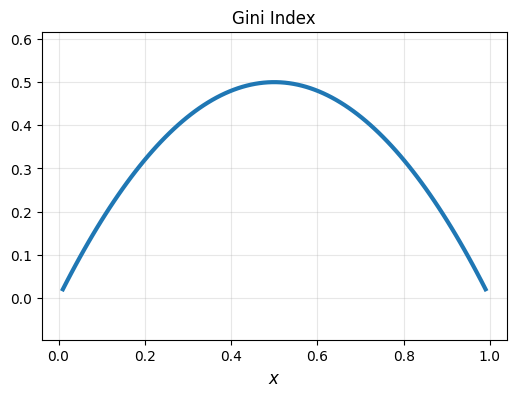

In [ ]:
# Gini Index

x = np.linspace(0.01, 0.99, 100)
y =
plt.figure(figsize = (6, 4))
plt.plot(x, y, linewidth = 3)
plt.xlabel(r'$x$', fontsize = 12)
plt.axis('equal')
plt.grid(alpha = 0.3)
plt.title('Gini Index')
plt.show()

In [ ]:
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

data = np.array([[0, 1, 1, 0, 1],
                [0, 1, 2, 0, 1],
                [1, 0, 0, 2, 0],
                [0, 1, 0, 2, 1],
                [0, 0, 0, 1, 1],
                [0, 0, 1, 1, 1],
                [0, 0, 0, 0, 1],
                [0, 1, 1, 2, 0],
                [1, 0, 2, 2, 0],
                [0, 1, 2, 1, 0],
                [0, 1, 0, 0, 1],
                [1, 0, 1, 1, 0],
                [0, 0, 0, 2, 1],
                [1, 0, 2, 0, 0],
                [0, 1, 1, 1, 0]])
X = data[:,0:4]
y = data[:,4]

In [ ]:
# Information entropy 함수 정의
def entropy(y):
    # y의 고유값과 각각의 빈도수 계산
    values, counts = np.unique(y, return_counts=True)
    p = counts / counts.sum()  # pk
    # 엔트로피 계산
    return -np.sum(p * np.log2(p))

# 전체 데이터의 엔트로피 계산
total_entropy = entropy(y)
print(f"전체 데이터 엔트로피: {total_entropy:.4f}")

#  피처별(출석, 과제, 중간고사, 기말고사) 정보 이득(Information Gain) 계산
for feature_idx in range(X.shape[1]):
    feature_values = np.unique(X[:, feature_idx])
    feature_entropy = 0
    for value in feature_values:
        # 해당 값에 해당하는 데이터 인덱스
        idx = X[:, feature_idx] == value
        subset_y = y[idx]
        weight = len(subset_y) / len(y)
        subset_entropy = entropy(subset_y)
        feature_entropy += weight * subset_entropy
    info_gain = total_entropy - feature_entropy
    print(f"Feature {feature_idx}의 정보 이득: {info_gain:.4f}")

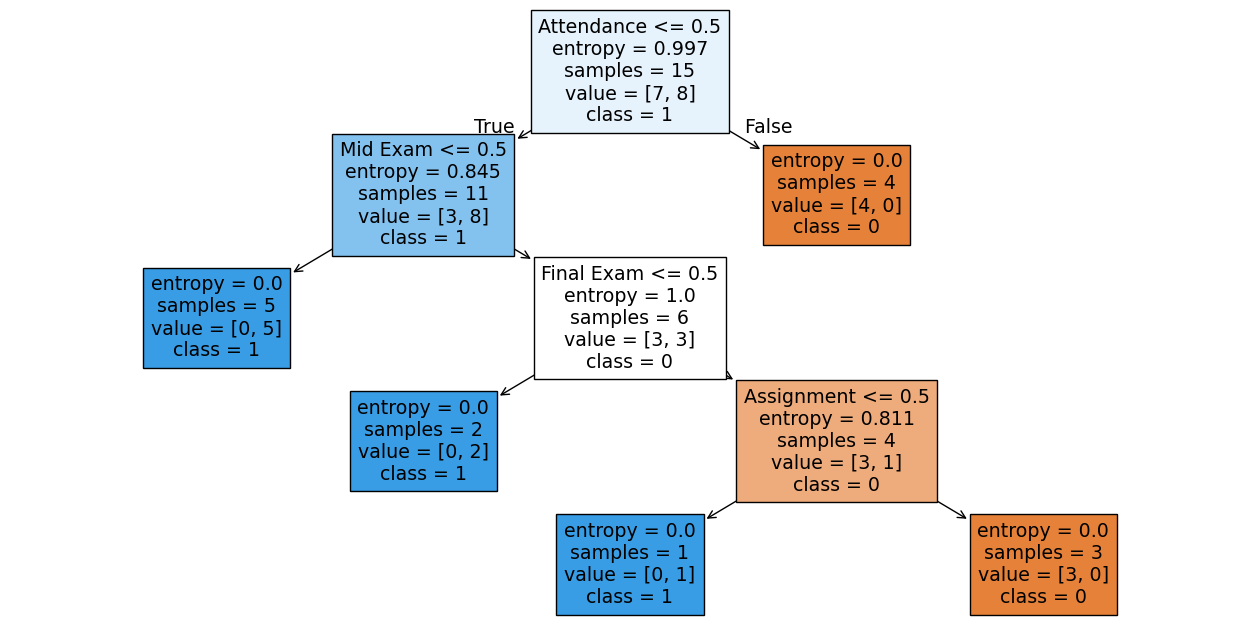

In [ ]:
# scikit-learn의 DecisionTreeClassifier를 엔트로피 기준으로 학습
clf =
clf.fit

# Decision Tree for binary classifier
plt.figure(figsize=(16,8))
tree.plot_tree(clf, feature_names=['Attendance', 'Assignment', 'Mid Exam', 'Final Exam'], class_names=['0', '1'], filled=True)
plt.show()

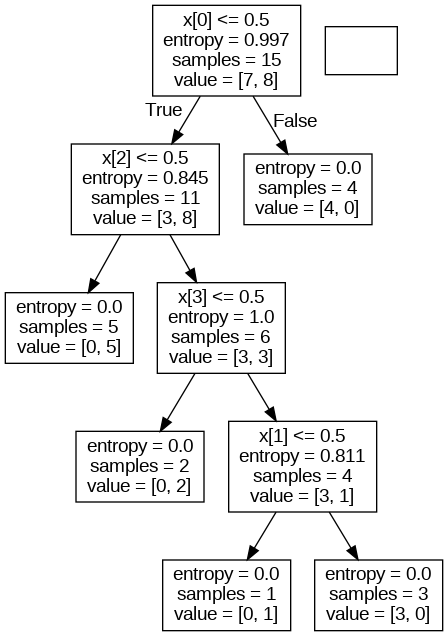

In [ ]:
# Decision Tree for binary classifier
dot_data = export_graphviz(clf)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())


**Pre-Pruning(사전 가지치기)**

In [ ]:
test = np.array([[0, 1, 1, 2, 0],
                [0, 1, 0, 2, 1],
                [0, 0, 1, 0, 1],
                [0, 1, 0, 2, 1],
                [0, 0, 0, 0, 1],
                [0, 0, 2, 0, 1],
                [0, 0, 0, 0, 1],
                [0, 0, 1, 2, 1],
                [0, 1, 0, 1, 0],
                [0, 0, 1, 1, 1],
                [0, 1, 1, 1, 0],
                [0, 0, 1, 1, 1],
                [1, 0, 2, 0, 0],
                [1, 0, 1, 0, 0],
                [0, 1, 2, 1, 0]])
testX = test[:,0:4]
testy = test[:,4]

In [ ]:
from sklearn.metrics import accuracy_score

# Train a decision tree with pre-pruning
tree_pre_pruned = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=10, max_depth=4, random_state=0)
tree_pre_pruned.fit(X, y)

# Evaluate on test data
y_pred_pre = tree_pre_pruned.predict(testX)
print("Accuracy (Pre-Pruned Tree):", accuracy_score(testy, y_pred_pre))

# Decision Tree for binary classifier
plt.figure(figsize=(12,6))
tree.plot_tree(tree_pre_pruned, feature_names=['Attendance', 'Assignment', 'Mid Exam', 'Final Exam'], class_names=['0', '1'], filled=True)
plt.show()

<br>

# Nonlinear Classification

<br>

__Data Generation__

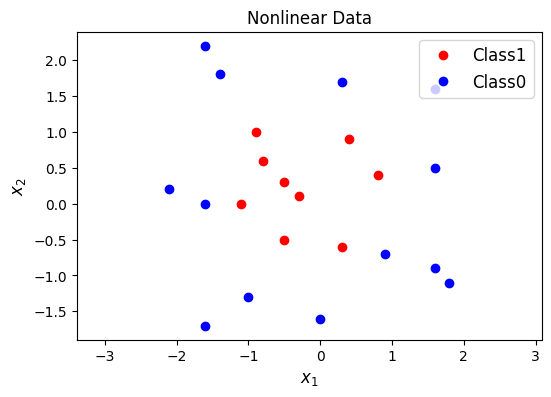

In [ ]:
# Nonlinear Classification
X1 = np.array([[-1.1,0],[-0.3,0.1],[-0.9,1],[0.8,0.4],[0.4,0.9],[0.3,-0.6],
               [-0.5,0.3],[-0.8,0.6],[-0.5,-0.5]])

X0 = np.array([[-1,-1.3], [-1.6,2.2],[0.9,-0.7],[1.6,0.5],[1.8,-1.1],[1.6,1.6],
               [-1.6,-1.7],[-1.4,1.8],[1.6,-0.9],[0,-1.6],[0.3,1.7],[-1.6,0],[-2.1,0.2]])

X1 = np.asmatrix(X1)
X0 = np.asmatrix(X0)

plt.figure(figsize = (6, 4))
plt.plot(X1[:,0], X1[:,1], 'ro', label = 'Class1')
plt.plot(X0[:,0], X0[:,1], 'bo', label = 'Class0')
plt.title('Nonlinear Data', fontsize = 12)
plt.xlabel(r'$x_1$', fontsize = 12)
plt.ylabel(r'$x_2$', fontsize = 12)
plt.legend(loc = 1, fontsize = 12)
plt.axis('equal')
plt.show()

In [ ]:
N = X1.shape[0]
M = X0.shape[0]

X = np.asarray(np.vstack([X1,X0]))
y = np.asarray(np.vstack([np.ones([N,1]), np.zeros([M,1])]))

In [ ]:
clf =
clf.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

In [ ]:
clf.predict([[0,0]])

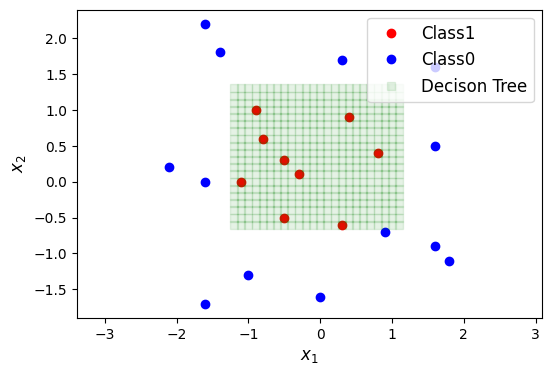

In [ ]:
# Nonlinear Decision Tree
[X1gr, X2gr] = np.meshgrid(np.arange(-3, 3, 0.1), np.arange(-3, 3, 0.1))

Xp = np.hstack([X1gr.reshape(-1,1), X2gr.reshape(-1,1)])

q = clf.predict(Xp)
q = np.asmatrix(q).reshape(-1,1)

C1 = np.where(q == 1)[0]

plt.figure(figsize = (6, 4))
plt.plot(X1[:,0], X1[:,1], 'ro', label = 'Class1')
plt.plot(X0[:,0], X0[:,1], 'bo', label = 'Class0')
plt.plot(Xp[C1,0], Xp[C1,1], 'gs', markersize = 6, alpha = 0.1, label = 'Decison Tree')
plt.xlabel(r'$x_1$', fontsize = 12)
plt.ylabel(r'$x_2$', fontsize = 12)
plt.legend(loc = 1, fontsize = 12)
plt.axis('equal')
plt.show()

<br>

# Multiclass Classification

<br>

__Data Generation__

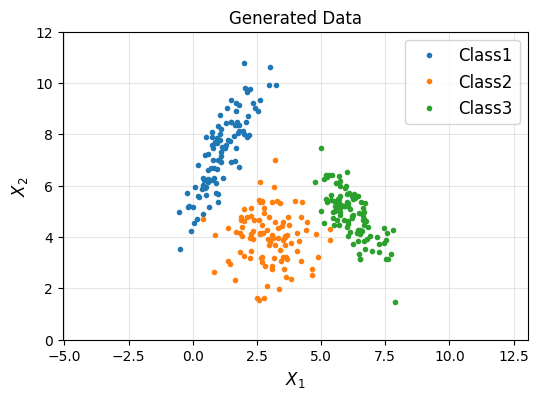

In [ ]:
# Multiclass Classification
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## generate three simulated clusters
mu1 = np.array([1, 7])
mu2 = np.array([3, 4])
mu3 = np.array([6, 5])

SIGMA1 = 0.8*np.array([[1, 1.5],
                       [1.5, 3]])
SIGMA2 = 0.5*np.array([[2, 0],
                       [0, 2]])
SIGMA3 = 0.5*np.array([[1, -1],
                       [-1, 2]])

X1 = np.random.multivariate_normal(mu1, SIGMA1, 100)
X2 = np.random.multivariate_normal(mu2, SIGMA2, 100)
X3 = np.random.multivariate_normal(mu3, SIGMA3, 100)

y1 = 1*np.ones([100,1])
y2 = 2*np.ones([100,1])
y3 = 3*np.ones([100,1])

plt.figure(figsize = (6, 4))
plt.title('Generated Data', fontsize = 12)
plt.plot(X1[:,0], X1[:,1], '.', label = 'Class1')
plt.plot(X2[:,0], X2[:,1], '.', label = 'Class2')
plt.plot(X3[:,0], X3[:,1], '.', label = 'Class3')
plt.xlabel('$X_1$', fontsize = 12)
plt.ylabel('$X_2$', fontsize = 12)
plt.legend(fontsize = 12)
plt.axis('equal')
plt.grid(alpha = 0.3)
plt.axis([-2, 10, 0, 12])
plt.show()

In [ ]:
X = np.vstack([X1, X2, X3])
y = np.vstack([y1, y2, y3])

clf =
clf.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

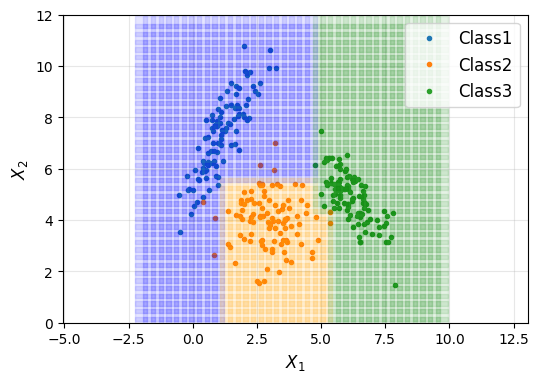

In [ ]:
res = 0.3
[X1gr, X2gr] = np.meshgrid(np.arange(-2, 10, res), np.arange(0, 12, res))

Xp = np.hstack([X1gr.reshape(-1,1), X2gr.reshape(-1,1)])

q = clf.predict(Xp)
q = np.asmatrix(q).reshape(-1,1)

C1 = np.where(q == 1)[0]
C2 = np.where(q == 2)[0]
C3 = np.where(q == 3)[0]

plt.figure(figsize = (6, 4))
plt.plot(X1[:,0], X1[:,1], '.', label = 'Class1')
plt.plot(X2[:,0], X2[:,1], '.', label = 'Class2')
plt.plot(X3[:,0], X3[:,1], '.', label = 'Class3')
plt.plot(Xp[C1,0], Xp[C1,1], 's', color = 'blue', markersize = 8, alpha = 0.1)
plt.plot(Xp[C2,0], Xp[C2,1], 's', color = 'orange', markersize = 8, alpha = 0.1)
plt.plot(Xp[C3,0], Xp[C3,1], 's', color = 'green', markersize = 8, alpha = 0.1)
plt.xlabel('$X_1$', fontsize = 12)
plt.ylabel('$X_2$', fontsize = 12)
plt.legend(fontsize = 12)
plt.axis('equal')
plt.grid(alpha = 0.3)
plt.axis([-2, 10, 0, 12])
plt.show()

<br>

# Ensemble (Random Forest)

<br>

__ensemble.RandomForestClassifier__

In [ ]:
# ensemble (Random Forest)
from sklearn import

clf =
clf.fit

RandomForestClassifier(max_depth=3, random_state=0)

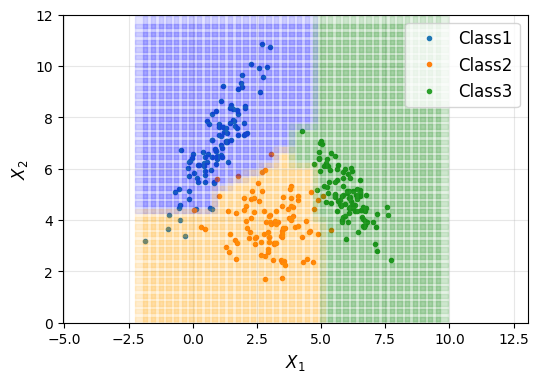

In [ ]:
res = 0.3
[X1gr, X2gr] = np.meshgrid(np.arange(-2, 10, res), np.arange(0, 12, res))

Xp = np.hstack([X1gr.reshape(-1,1), X2gr.reshape(-1,1)])

q = clf.predict(Xp)
q = np.asmatrix(q).reshape(-1,1)

C1 = np.where(q == 1)[0]
C2 = np.where(q == 2)[0]
C3 = np.where(q == 3)[0]

plt.figure(figsize = (6, 4))
plt.plot(X1[:,0], X1[:,1], '.', label = 'Class1')
plt.plot(X2[:,0], X2[:,1], '.', label = 'Class2')
plt.plot(X3[:,0], X3[:,1], '.', label = 'Class3')
plt.plot(Xp[C1,0], Xp[C1,1], 's', color = 'blue', markersize = 8, alpha = 0.1)
plt.plot(Xp[C2,0], Xp[C2,1], 's', color = 'orange', markersize = 8, alpha = 0.1)
plt.plot(Xp[C3,0], Xp[C3,1], 's', color = 'green', markersize = 8, alpha = 0.1)
plt.xlabel('$X_1$', fontsize = 12)
plt.ylabel('$X_2$', fontsize = 12)
plt.legend(fontsize = 12)
plt.axis('equal')
plt.grid(alpha = 0.3)
plt.axis([-2, 10, 0, 12])
plt.show()